In [2]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_excel
import bisect
import numpy as np
from array import *
import datetime
import calendar
from pip._vendor.distlib.compat import raw_input

### Define functions 

In [3]:
# functions used
def scale(x):
    return ((x-min(x))/(max(x)-min(x)))

def unscaletime(x):
    return (((max(time) - min(time)) * x) + min(time))

def Q(x):
    z = 0
    while z < w[-1]:
        if x > lower_limits[z] and x <= upper_limits[z]:
            y = (c[z] * ((x - a[z]) ** b[z]))
            break
        elif x > upper_limits[z]:
            z = z + 1
    else:
        y = (c[w[-1]] * ((x - a[w[-1]]) ** b[w[-1]]))
    return (y)

# Initial Prepartion of River data

In [4]:
#input corresponding river data that you want to do verification   
river_name = raw_input("Enter your river name:")
print("your river is, %s." %river_name)
print(river_name)

if river_name == "ciliwung":
    Data = pd.read_csv('river_ciliwung.csv')
    (nratingc, nriverflag, nlength) = (1, 0, 0)  
    time = Data['Day']
    Flow = Data['Flowrate']
    height = Data['Riverheight']
    ht = 2.8
    error = 0.05
    stitle = 'River Ciliwung flood 2020 at Depok floodgate, Djakarta'
    c = [11.403]
    a = [-0.2]
    b = [1.715]
    Qt = c[0]*(ht-a[0])**(b[0])
    lower_limits = [0.0]
    upper_limits = [10]
elif river_name == "ouse":
    Data = pd.read_csv('river_ouse.csv')
    (nratingc, nriverflag, nlength) = (0, 0, 0)
    ht = 6.17
    error = 0.08
    time = Data['Day']
    height = Data['Stage'] 
    Flow = Data['Flow']
    stitle = 'River Ouse flood 2015 at Skelton in York'
elif river_name == "don":
    Data = pd.read_csv('river_don_2019.csv')
    (nratingc, nriverflag, nlength) = (1, 0, 0)
    ht = 2.9
    b = [1.3803, 1.2967, 1.1066]
    a = [0.3077, 0.34, -0.5767]
    c = [77.2829, 79.5656, 41.3367]
    lower_limits = [0.39, 0.927, 1.436]
    upper_limits = [0.927, 1.426, 3.58]
    error = 0.0799 
    time = Data['Time']
    height = Data['Height']
    stitle = 'River Don at Sheffield/Hadfields 2019'
elif river_name == "wey_guildford_2020":
    Data = pd.read_csv('river_wey_guildford_from_EA_2020.csv')
    (nratingc, nriverflag, nlength) = (0, 0, 0)
    ht = 2.6
    error = 0.08
    time = Data['Day']
    height = Data['Stage'] 
    Flow = Data['Flow']
    stitle = 'River Wey flood 2020 at Guildford town'
elif river_name == "wey_guildford_2013":
    Data = pd.read_csv('river_wey_guildford_from_EA_2013.csv')
    (nratingc, nriverflag, nlength) = (0, 0, 0)
    ht = 2.6
    error = 0.08
    time = Data['Day']
    height = Data['Stage']
    Flow = Data['Flow']
    stitle = 'River Wey flood 2013 at Guildford town'
elif river_name == "severn_bewdley":
    Data = pd.read_csv('river_severn_bewdley_changes.csv')
    (nratingc, nriverflag, nlength) = (0, 0, 0)
    ht = 3.3
    error = 0.08
    time = Data['Day']
    height = Data['Stage']
    Flow = Data['Flow']
    stitle = 'River Severn flood 2021 at Bewdley town'

Enter your river name:wey_guildford_2013
your river is, wey_guildford_2013.
wey_guildford_2013


In [7]:
if nratingc == 1:
    w = []
    for i in range(len(a)):
        w.append(i)

    qt = Q(ht)  # For case with rating curve given and no given flow data
    qtmin = (1.0 - error) * qt  # Use an overall error upper bound
    qtmax = (1.0 + error) * qt  # Use an overall error upper bound
    #print('hello qt:', qt)
    Flow = []
    Flowmin = []
    Flowmax = []
    for i in height:
        Flow.append(Q(i))
        Flowmin.append((1.0 - error) * Q(i))  # Use an overall error upper bound
        Flowmax.append((1.0 + error) * Q(i))  # Use an overall error upper bound

    scaledFlow = []
    for i in Flow:
        scaledFlow.append((i - min(Flow)) / (max(Flow) - min(Flow)))
    if nriverflag > 0 and nlength == 0:  # slice arrays to ignore first nriverflag number of data; clumsy slicing set up
        lent = len(time)
        time1 = np.zeros(lent - nriverflag)
        height1 = np.zeros(lent - nriverflag)
        Flow1 = np.zeros(lent - nriverflag)
        time1[0:lent - nriverflag] = time[nriverflag:lent]  #
        height1[0:lent - nriverflag] = height[nriverflag:lent]
        Flow1[0:lent - nriverflag] = Flow[nriverflag:lent]
        del time, height, Flow
        (time, height, Flow) = (time1, height1, Flow1)
        del time1, height1, Flow1
        print('hallo WARNING: very clumsy way of slicing and reducing; please improve')
    elif nriverflag > 0 and nlength > 0:  # slice arrays from nriverflag to nriverflag+nlength
        lent = len(time)
        time1 = np.zeros(nlength)
        height1 = np.zeros(nlength)
        Flow1 = np.zeros(nlength)
        time1[0:nlength] = time[nriverflag:nriverflag + nlength]  #
        height1[0:nlength] = height[nriverflag:nriverflag + nlength]
        Flow1[0:nlength] = Flow[nriverflag:nriverflag + nlength]
        (time2, height2, Flow2) = (time, height, Flow)
        del time, height, Flow
        time = np.zeros(nlength)
        height = np.zeros(nlength)
        Flow = np.zeros(nlength)
        time = time1
        height = height1
        Flow = Flow1
        if nriver == 13:
            heightmin1 = np.zeros(nlength)
            heightmax1 = np.zeros(nlength)
            heightmin1[0:nlength] = heightmin[nriverflag:nriverflag + nlength]
            heightmax1[0:nlength] = heightmax[nriverflag:nriverflag + nlength]
            del heightmin, heightmax
            heightmin = np.zeros(nlength)
            heightmax = np.zeros(nlength)
            heightmin = heightmin1
            heightmax = heightmax1
elif nratingc == 0:
    if river_name == "ciliwung":  # special case Ciliwung river
        Flow = Data['Flowrate']  # Specific for case where flow data given as well instead of rating curve; reprogram doestwork
    else:
        Flow = Data['Flow']  # Specific for case where flow data given as well instead of rating curve; reprogram
    nend = len(time)
    if nriverflag > 0 and nlength == 0:  # slice arrays to ignore first nriverflag number of data; clumsy slicing set up
        lent = len(time)
        time1 = np.zeros(lent - nriverflag)
        height1 = np.zeros(lent - nriverflag)
        Flow1 = np.zeros(lent - nriverflag)
        time1[0:lent - nriverflag] = time[nriverflag:lent]  #
        height1[0:lent - nriverflag] = height[nriverflag:lent]
        Flow1[0:lent - nriverflag] = Flow[nriverflag:lent]
        del time, height, Flow
        (time, height, Flow) = (time1, height1, Flow1)
        del time1, height1, Flow1
        #
        print('hallo WARNING: very clumsy way of slicing and reducing; please improve')
    elif nriverflag > 0 and nlength > 0:  # slice arrays from nriverflag to nriverflag+nlength
        lent = len(time)
        time1 = np.zeros(nlength)
        height1 = np.zeros(nlength)
        Flow1 = np.zeros(nlength)
        time1[0:nlength] = time[nriverflag:nriverflag + nlength]  #
        height1[0:nlength] = height[nriverflag:nriverflag + nlength]
        Flow1[0:nlength] = Flow[nriverflag:nriverflag + nlength]
        (time2, height2, Flow2) = (time, height, Flow)
        del time, height, Flow
        time = np.zeros(nlength)
        height = np.zeros(nlength)
        Flow = np.zeros(nlength)
        time = time1
        height = height1
        Flow = Flow1

    scaledFlow = []
    for i in Flow:
        scaledFlow.append((i - min(Flow)) / (max(Flow) - min(Flow)))
    Flowmin = (1.0 - error) * Flow
    Flowmax = (1.0 + error) * Flow
    nwin = 0
    for i in range(1, len(height)):
        if height[i] > ht and height[i - 1] < ht and nwin == 0:
            qt = Flow[i - 1] + (Flow[i] - Flow[i - 1]) * (ht - height[i - 1]) / (height[i] - height[i - 1])
            nwin = 1
        if height[i] < ht and height[i - 1] > ht and nwin == 0:
            qt = Flow[i - 1] + (Flow[i] - Flow[i - 1]) * (ht - height[i - 1]) / (height[i] - height[i - 1])
            nwin = 1
    qtmin = (1.0 - error) * qt
    qtmax = (1.0 + error) * qt
print('qt value', qt)

qt value 49.5905172413793


qtup 50.9
qtdown 51.7


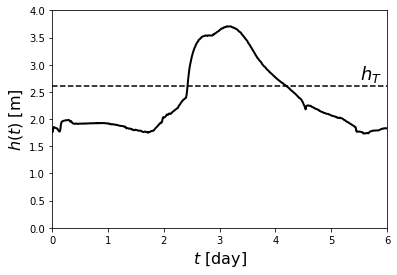

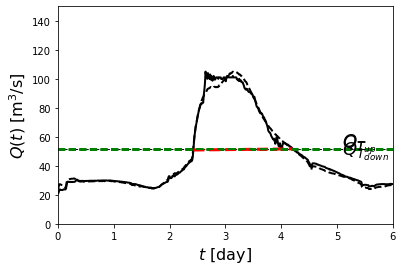

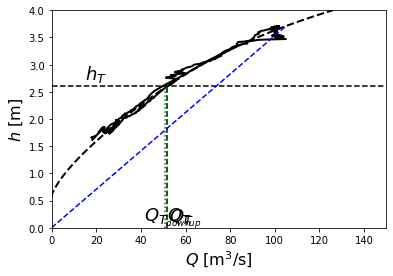

In [11]:
if river_name == "ciliwing":  
    ncheckk = 1
    if ncheckk == 1:
        plt.figure(111)
        plt.plot(time, height, '-k', linewidth=2)
        plt.ylabel('$h(t)$ [m]', fontsize=16)
        plt.xlabel('$t$ [day]', fontsize=16)
        hmin = 0
        hmax = 4.5
        tmin = 1
        tmax = 2
        Qmin = 0
        Qmax = 150
        plt.plot([tmin, tmax], [ht, ht], '--k')
        plt.text(0.92 * tmax, 1.05 * ht, '$h_T$', size=18)
        plt.axis([tmin, tmax, hmin, hmax])
        plt.title("b) Ciliwung, Depok Floodgate")
        plt.figure(112)
        plt.plot(time, c[0] * (height - a[0]) ** b[0], '-k', linewidth=2)
        plt.plot([tmin, tmax], [Qt, Qt], '--k')
        plt.text(0.92 * tmax, 1.05 * Qt, '$Q_T$', size=18)
        plt.text(1.5, 90, '$FEV$', size=18)
        plt.ylabel('$Q(t)$ [m$^3/$s]', fontsize=16)
        plt.xlabel('$t$ [day]', fontsize=16)
        plt.axis([tmin, tmax, Qmin, Qmax])
        plt.title("b) Ciliwung, Depok Floodgate")
        plt.figure(113)
        Nhh = 50
        dhh = (hmax - a[0]) / Nhh
        hh = np.zeros(Nhh + 1)
        for jj in range(0, Nhh + 1):
            hh[jj] = a[0] + jj * dhh
            print('jj', jj, dhh, hh[jj], c[0] * (hh[jj] - a[0]) ** (b[0]))
        plt.plot(c[0] * (hh - a[0]) ** (b[0]), hh, '-k', linewidth=2)
        plt.plot([0, Qt], [ht, ht], '--k')
        plt.text(0.1 * Qmax, 1.05 * ht, '$h_T$', size=18)
        plt.plot([Qt, Qt], [hmin, ht], '--k')
        plt.text(1.1 * Qt, 0.05 * ht, '$Q_T$', size=18)
        plt.plot([0, np.max(c[0] * (hh - a[0]) ** b[0])], [0, np.max(hh)], '--b')
        plt.ylabel('$h$ [m]', fontsize=16)
        plt.xlabel('$Q$ [m$^3/$s]', fontsize=16)
        plt.axis([Qmin, Qmax, hmin, hmax])
        plt.title("b) Ciliwung, Depok Floodgate")
        
# Ouse river case is special here change to test severn_bewdley,wey_guildford_2013  and wey_guildford_2020
elif river_name == "wey_guildford_2013":  
    ncheckk = 1
    for jj in range(1, len(height)):
        if height[jj - 1] < ht and height[jj] > ht:
            jup = jj
        if height[jj - 1] > ht and height[jj] < ht:
            jdown = jj
    qtup = Flow[jup]  # approximation
    qtdown = Flow[jdown]  # approximation
    print("qtup",qtup)
    print("qtdown",qtdown)

    if ncheckk == 1:
        plt.figure(111)
        plt.plot(time, height, '-k', linewidth=2)
        plt.ylabel('$h(t)$ [m]', fontsize=16)
        plt.xlabel('$t$ [day]', fontsize=16)
        hmin = 0
        hmax = 4      #for wey_guildford_2013 change to 4, wey_guildford_2020 to 4, severn_bewdley change to 6
        tmin = 0
        tmax = 6       #for wey_guildford_2013 change to 6, wey_guildford_2020 to 4, severn_bewdley change to 6
        Qmin = 0
        Qmax = 150      #for wey_guildford_2013 change to 150, wey_guildford_2020 to 150, severn_bewdley change to 600
        z = np.zeros(4)
        z = np.polyfit(height, Flow, 4)
        #print('z', z)
        AA = np.zeros((4, 4))
        ff = np.zeros(4)
        d11 = np.inner(height, height)
        d21 = np.inner(height ** 2, height)
        d31 = np.inner(height ** 3, height)
        d41 = np.inner(height ** 4, height)
        d22 = np.inner(height ** 2, height ** 2)
        d32 = np.inner(height ** 3, height ** 2)
        d42 = np.inner(height ** 4, height ** 2)
        d33 = np.inner(height ** 3, height ** 3)
        d43 = np.inner(height ** 4, height ** 3)
        d44 = np.inner(height ** 4, height ** 4)
        ff[0] = np.inner(Flow, height)
        ff[1] = np.inner(Flow, height ** 2)
        ff[2] = np.inner(Flow, height ** 3)
        ff[3] = np.inner(Flow, height ** 4)
        AA = np.array([[d11, d21, d31, d41], [d21, d22, d32, d42], [d31, d32, d33, d43], [d41, d42, d43, d44]])
        z = np.linalg.solve(AA, ff)
        Qt = z[0] * ht + z[1] * ht ** 2 + z[2] * ht ** 3 + z[3] * ht ** 4
        #print("Qt",Qt)
        #print('z', z)
        a0 = -9539.05
        a1 = 7056.26
        a2 = -1909.17
        a3 = 227.97
        a4 = -9.97
        Flowqh = 0.0 * Flow
        Flowqh = z[0] * height + z[1] * height ** 2 + z[2] * height ** 3 + z[3] * height ** 4
        plt.plot([tmin, tmax], [ht, ht], '--k')
        plt.text(0.92 * tmax, 1.05 * ht, '$h_T$', size=18)
        plt.axis([tmin, tmax, hmin, hmax])
        #plt.title("c) Ouse, Skelton, York")
        plt.figure(112)
        plt.plot(time, Flow, '-k', linewidth=2)
        plt.plot(time, Flowqh, '--k', linewidth=2)
        plt.plot([tmin, tmax], [Qt, Qt], '--k', linewidth=1)
        plt.plot([tmin, tmax], [qtup, qtup], '--g', linewidth=2)
        plt.plot([time[jup], time[jdown]], [qtup, qtdown], '--r', linewidth=3)
        plt.plot([tmin, tmax], [qtdown, qtdown], '--g', linewidth=2)
        plt.ylabel('$Q(t)$ [m$^3/$s]', fontsize=16)
        plt.xlabel('$t$ [day]', fontsize=16)
        plt.axis([tmin, tmax, Qmin, Qmax])
        plt.text(0.85 * tmax, 1.02 * Qt, '$Q_T$', size=18)
        plt.text(0.85 * tmax, 1.04 * qtup, '$Q_{T_{up}}$', size=18)
        plt.text(0.85 * tmax, 0.92 * qtdown, '$Q_{T_{down}}$', size=18)
        plt.figure(113)
        Nhh = 50
        dhh = hmax / Nhh
        hh = np.zeros(Nhh + 1)
        Qq = np.zeros(Nhh + 1)
        for jj in range(0, Nhh + 1):
            hh[jj] = jj * dhh
            Qq[jj] = z[0] * hh[jj] + z[1] * hh[jj] ** 2 + z[2] * hh[jj] ** 3 + z[3] * hh[jj] ** 4
        plt.plot(Qq, hh, '--k', linewidth=2)
        plt.plot(Flow, height, '-k', linewidth=2)
        plt.plot([0, Qmax], [ht, ht], '--k')
        plt.plot([Qt, Qt], [hmin, ht], '--k')
        plt.plot([qtup, qtup], [hmin, ht], ':g')
        plt.plot([qtdown, qtdown], [hmin, ht], ':g')
        plt.plot([0, np.max(Flow)], [0, np.max(height)], '--b')
        plt.text(1.02 * Qt, 0.05 * ht, '$Q_T$', size=18)
        plt.text(1.02 * qtup, 0.05 * ht, '$Q_{T_{up}}$', size=18)
        plt.text(0.8 * qtdown, 0.05 * ht, '$Q_{T_{down}}$', size=18)
        plt.text(0.1 * Qmax, 1.05 * ht, '$h_T$', size=18)
        plt.ylabel('$h$ [m]', fontsize=16)
        plt.xlabel('$Q$ [m$^3/$s]', fontsize=16)
        plt.axis([Qmin, Qmax, hmin, hmax])

# preparing QT, FEV, Tf,  scaled hm and Qm and finally generating quadrant plot

FEV: 5041519.137931021
discharge threshold: 49.5905172413793


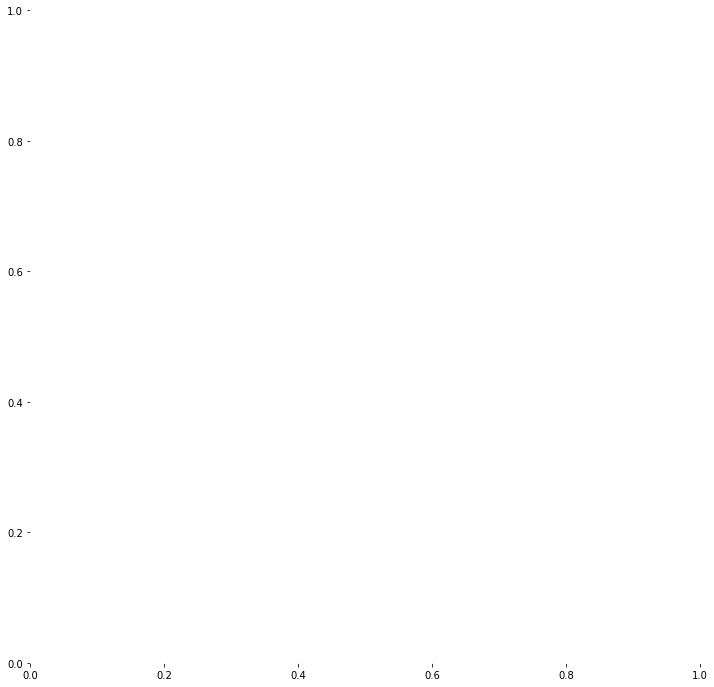

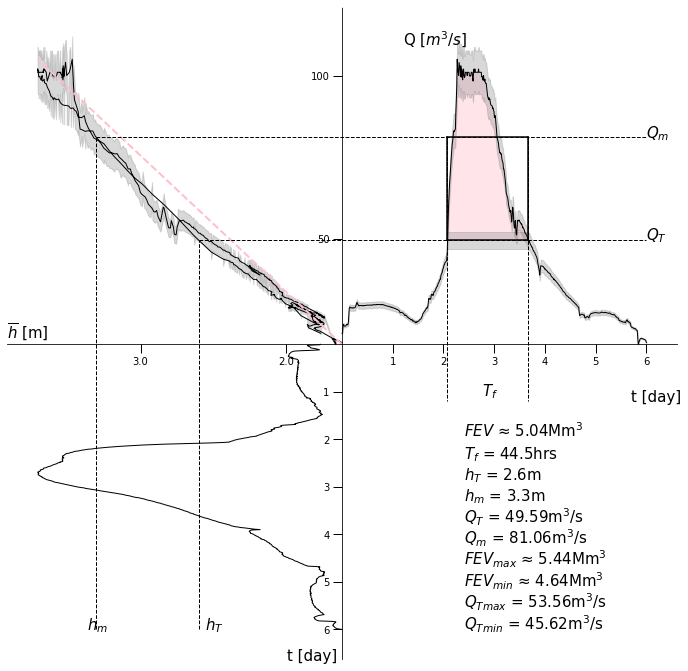

<Figure size 864x864 with 0 Axes>

Finished program!


In [13]:
time_increment = 900
number_of_days = 6          #change this as per river data 
scaledtime = scale(time)
scaledheight = scale(height)
error_height_up = [i * (1 + error) for i in height]
error_height_down = [i * (1 - error) for i in height]
scaledtime = scale(time)
scaledheight = scale(height)

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [12, 12]
plt.rcParams['axes.edgecolor'] = 'white'
fig, ax = plt.subplots()
ax.spines['left'].set_position(('zero'))
ax.spines['bottom'].set_position(('zero'))
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

scaledFlow_up = [i * (1 + error) for i in scaledFlow]
scaledFlow_down = [i * (1 - error) for i in scaledFlow]
negheight = -scaledheight
negday = -(scaledtime)

ax.plot(negheight, scaledFlow, 'black', linewidth=1)
ax.plot([0, -1], [0, 1], 'pink', linestyle='--', marker='', linewidth=2)
ax.plot(scaledtime, scaledFlow, 'black', linewidth=1)
ax.plot(negheight, negday, 'black', linewidth=1)

scaledht = (ht - min(height)) / (max(height) - min(height))
scaledqt = (qt - min(Flow)) / (max(Flow) - min(Flow))

QT = []
for i in scaledFlow:
    i = scaledqt
    QT.append(i)

SF = np.array(scaledFlow)
e = np.array(QT)

ax.fill_between(scaledtime, SF, e, where=SF >= e, facecolor='pink', alpha=0.4)
idx = np.argwhere(np.diff(np.sign(SF - e))).flatten()

f = scaledtime[idx[0]]
g = scaledtime[idx[-1]]

C = unscaletime(f)
d = unscaletime(g)

Tf = (d - C) * 24

flow = []
for i in Flow:
    if i >= qt:
        flow.append((i - qt) * (time_increment))
flowmin = []
for i in Flowmin:
    if i >= qtmin:
        flowmin.append((i - qtmin) * (time_increment))
flowmax = []
for i in Flowmax:
    if i >= qtmax:
        flowmax.append((i - qtmax) * (time_increment))

FEV = sum(flow)
print("FEV:", FEV)
FEV_min = sum(flowmin)
FEV_max = sum(flowmax)

Tfs = Tf * (60 ** 2)

qm = (FEV / Tfs) + qt
scaledqm = (qm - min(Flow)) / (max(Flow) - min(Flow))

if nratingc == 1:
    hm = ((qm / c[-1]) ** (1 / b[-1])) + a[-1] 
elif nratingc == 0:
    nwin = 0
    for i in range(1, len(Flow)):
        if Flow[i] > qm and Flow[i - 1] < qm and nwin == 0:
            hm = height[i - 1] + (height[i] - height[i - 1]) * (qm - Flow[i - 1]) / (Flow[i] - Flow[i - 1])
            nwin = 1
        if Flow[i] < qm and Flow[i - 1] > qm and nwin == 0:
            hm = height[i - 1] + (height[i] - height[i - 1]) * (qm - Flow[i - 1]) / (Flow[i] - Flow[i - 1])
            nwin = 1

scaledhm = (hm - min(height)) / (max(height) - min(height))


ax.plot([-scaledht, -scaledht], [-1, scaledqt], 'black', linestyle='--', linewidth=1)
ax.plot([-scaledhm, -scaledhm], [-1, scaledqm], 'black', linestyle='--', linewidth=1)
ax.plot([-scaledht, 1], [scaledqt, scaledqt], 'black', linestyle='--', linewidth=1)
ax.plot([-scaledhm, 1], [scaledqm, scaledqm], 'black', linestyle='--', linewidth=1)

ax.plot([f, f, f], [scaledqt, scaledqm, -1 / 5], 'black', linestyle='--', linewidth=1)
ax.plot([g, g, g], [scaledqt, scaledqm, -1 / 5], 'black', linestyle='--', linewidth=1)
ax.plot([f, f], [scaledqm, scaledqt], 'black', linewidth=1.5)
ax.plot([f, g], [scaledqm, scaledqm], 'black', linewidth=1.5)
ax.plot([f, g], [scaledqt, scaledqt], 'black', linewidth=1.5)
ax.plot([g, g], [scaledqm, scaledqt], 'black', linewidth=1.5)

h = []
for i in np.arange(1, number_of_days + 1):
    h.append(i / number_of_days)

l = np.arange(0, max(Flow) + 50, 50)
m = bisect.bisect(l, min(Flow))

n = []
for i in np.arange(l[m], max(Flow) + 50, 50):
    n.append(int(i))

tickfac = 1
o = np.arange(0, max(height) + 1, tickfac)
p = bisect.bisect(o, min(height))

q = []
for i in np.arange(o[p], max(height) + 1, tickfac):
    q.append(i)

k = []
for i in q:
    k.append(-(i - min(height)) / (max(height) - min(height)))

j = []
for i in n:
    j.append((i - min(Flow)) / (max(Flow) - min(Flow)))

ticks_x = k + h

r = []
for i in h:
    r.append(-i)

ticks_y = r + j

s = []
for i in np.arange(1, number_of_days + 1):
    s.append(i)

Ticks_x = q + s
Ticks_y = s + n

ax.set_xticks(ticks_x)
ax.set_yticks(ticks_y)
ax.set_xticklabels(Ticks_x)
ax.set_yticklabels(Ticks_y)

lists1 = sorted(zip(*[negheight, scaledFlow_down]))
negheight1, scaledFlow_down1 = list(zip(*lists1))

lists2 = sorted(zip(*[negheight, scaledFlow_up]))
negheight1, scaledFlow_up1 = list(zip(*lists2))

ax.fill_between(negheight1, scaledFlow_down1, scaledFlow_up1, color="grey", alpha=0.3)
ax.fill_between(scaledtime, scaledFlow_up, scaledFlow_down, color="grey", alpha=0.3)
QtU = scaledqt * (1 + error)
QtD = scaledqt * (1 - error)
ax.fill_between([scaledtime[idx[0]], scaledtime[idx[-1]]], QtU, QtD, color="grey", alpha=0.3)

ax.tick_params(axis='x', colors='black', direction='out', length=9, width=1)
ax.tick_params(axis='y', colors='black', direction='out', length=9, width=1)

plt.text(-scaledht + 0.02, -1, '$h_T$', size=15)
plt.text(-scaledhm -0.03, -1, '$h_m$', size=15)
plt.text(1, scaledqm, '$Q_m$', size=15)
plt.text(1, scaledqt, '$Q_T$', size=15)
plt.text(((f + g) / 2) - 1 / 50, -0.18, '$T_f$', size=15)
plt.text(0.2, 1.05, 'Q $[m^3/s]$', size=15)
plt.text(0.95, -0.2, 't [day]', size=15)
plt.text(-0.18, -1.11, 't [day]', size=15)
plt.text(-1.1, 0.02, '$\overline {h}$ [m]', size=15)
ax.scatter(0, 0, color='white')

A = round(FEV / (10 ** 6), 2)
B = round(Tf, 2)
C = round(ht, 2)
D = round(hm, 2)
print("discharge threshold:", qt)
E = round(qt, 2)
F = round(qm, 2)
Amax = round(FEV_max / (10 ** 6), 2)
Amin = round(FEV_min / (10 ** 6), 2)
Emin = round(qtmin, 2)
Emax = round(qtmax, 2)

plt.text(0.4, -0.325, '$FEV$ ≈ ' + str(A) + 'Mm$^3$', size=15)
plt.text(0.4, -0.4, '$T_f$ = ' + str(B) + 'hrs', size=15)
plt.text(0.4, -0.475, '$h_T$ = ' + str(C) + 'm', size=15)
plt.text(0.4, -0.55, '$h_m$ = ' + str(D) + 'm', size=15)
plt.text(0.4, -0.625, '$Q_T$ = ' + str(E) + 'm$^3$/s', size=15)
plt.text(0.4, -0.7, '$Q_m$ = ' + str(F) + 'm$^3$/s', size=15)
plt.text(0.4, -0.775, '$FEV_{max}$ ≈ ' + str(Amax) + 'Mm$^3$', size=15)
plt.text(0.4, -0.85, '$FEV_{min}$ ≈ ' + str(Amin) + 'Mm$^3$', size=15)
plt.text(0.4, -0.925, '$Q_{Tmax}$ = ' + str(Emax) + 'm$^3$/s', size=15)
plt.text(0.4, -1.0, '$Q_{Tmin}$ = ' + str(Emin) + 'm$^3$/s', size=15)

plt.savefig("test.png")

plt.show(block=True)
plt.pause(0.001)
plt.gcf().clear()
plt.show(block=False)

print("Finished program!")

# plot 2m-deep squared lake

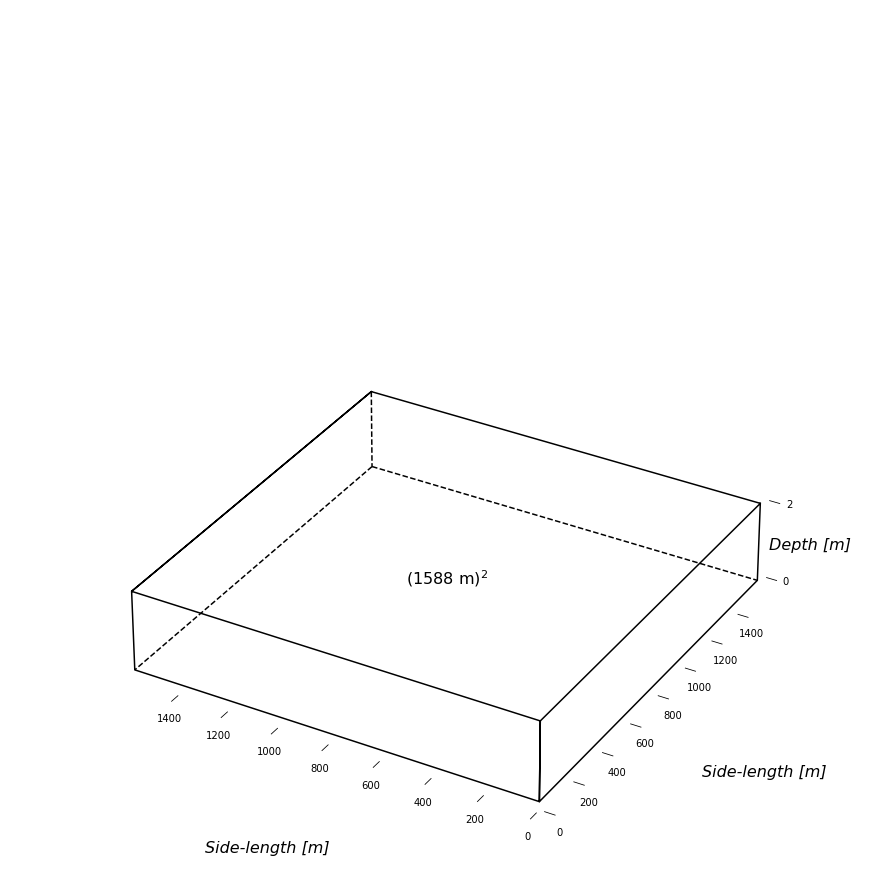

In [14]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=plt.figaspect(1)*1)
ax = Axes3D(fig)

plt.rcParams['axes.edgecolor']='white'
plt.rcParams["figure.figsize"] = [20,16]

ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

side = (FEV/2)**(0.5)

E_1= [side, side]
E_2= [side, side]
E_3= [2, 0]

E_4= [side, 0]
E_5 = [side, side]
E_6 = [0, 0]

E_7 = [side, side]
E_8= [side, 0]
E_9 = [0, 0]

ax.plot(E_1, E_2, E_3, '--', color = 'k')
ax.plot(E_4, E_5, E_6, '--', color = 'k')
ax.plot(E_7, E_8, E_9, '--', color = 'k')

x = [side, side, side, 0, 0, 0, side, side, 0, 0, 0, 0]
y = [side, 0, 0, 0, 0, side, side, 0, 0, 0, side, side]
z = [2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2]

ax.plot(x, y, z, color = 'k')

ax.text(side/2, -side/2, 0, 'Side-length [m]',style='italic', size=16)
ax.text(-side/4,side/4,0, 'Side-length [m]', style='italic',size=16)
ax.text(-0.02*side, 1.01*side,0.8, 'Depth [m]',style='italic',size=16)

ax.text(side/1.7,side/2.2,1,'('+str(int(round(side)))+' m)$^2$', size=16)

ax.set_zticks([0, 2])

ax.set_xlim(side,0)
ax.set_ylim(0,side)
ax.set_zlim(0,10)
plt.savefig("lake.png")

## plotting ht vs side length of square lake vs discharge 

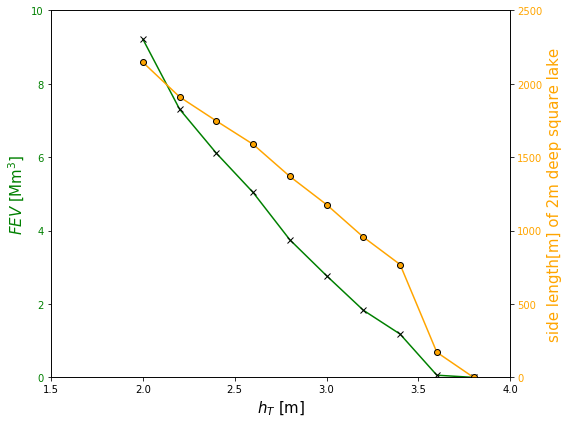

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['axes.grid']=False
plt.rcParams["figure.figsize"] = [8,6]
plt.rcParams['axes.edgecolor']='black'
fig, ax1 = plt.subplots()

#Import the Data
guildford_2013 = pd.read_csv('guildford_2013_ht_fev.csv')   # guildford 2013
hT = guildford_2013['hT']
FEV = guildford_2013['FEV']
Side = guildford_2013['Squarelake']

ax1.set_xlabel('$h_T$ [m]', size=15)
ax1.set_ylabel('$FEV$ [Mm$^3$]', size=15, color='green')
ax1.plot(hT, FEV, color='green', marker='x', markeredgecolor='k')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_ybound(0,10)
ax1.set_ylim(0,10)
ax1.set_xlim(1.5,4)


ax2 = ax1.twinx()

ax2.set_ylabel('side length[m] of 2m deep square lake', size=15, color='orange')
ax2.plot(hT, Side, color='orange', marker='o', markeredgecolor='k')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ybound(0,2500)

fig.tight_layout()
plt.show()

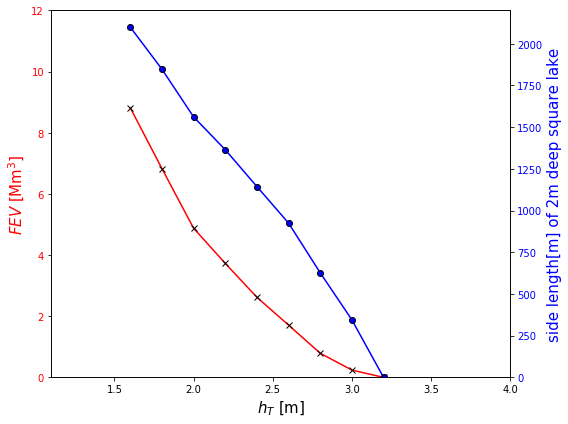

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['axes.grid']=False
plt.rcParams["figure.figsize"] = [8,6]
plt.rcParams['axes.edgecolor']='black'
fig, ax1 = plt.subplots()

#Import the Data
guildford_2013 = pd.read_csv('guildford_2020_ht_fev.csv')   # guildford 2020
hT = guildford_2013['hT']
FEV = guildford_2013['FEV']
Side = guildford_2013['Squarelake']

ax1.set_xlabel('$h_T$ [m]', size=15)
ax1.set_ylabel('$FEV$ [Mm$^3$]', size=15, color='red')
ax1.plot(hT, FEV, color='red', marker='x', markeredgecolor='k')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_ybound(0,8)
ax1.set_ylim(0,12)
ax1.set_xlim(1.1,4)


ax2 = ax1.twinx()

ax2.set_ylabel('side length[m] of 2m deep square lake', size=15, color='blue')
ax2.plot(hT, Side, color='blue', marker='o', markeredgecolor='k')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ybound(0,2200)

fig.tight_layout()
plt.show()

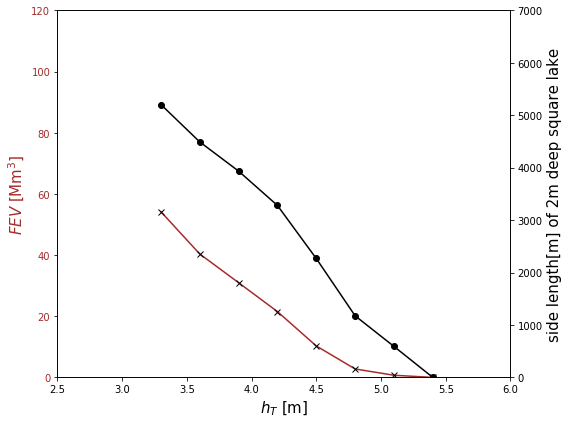

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['axes.grid']=False
plt.rcParams["figure.figsize"] = [8,6]
plt.rcParams['axes.edgecolor']='black'
fig, ax1 = plt.subplots()

#Import the Data
guildford_2013 = pd.read_csv('bewdley_ht_fev.csv')
hT = guildford_2013['hT']
FEV = guildford_2013['FEV']
Side = guildford_2013['Squarelake']

ax1.set_xlabel('$h_T$ [m]', size=15)
ax1.set_ylabel('$FEV$ [Mm$^3$]', size=15, color='brown')
ax1.plot(hT, FEV, color='brown', marker='x', markeredgecolor='k')
ax1.tick_params(axis='y', labelcolor='brown')
ax1.set_ybound(0,8)
ax1.set_ylim(0,120)
ax1.set_xlim(2.5,6)


ax2 = ax1.twinx()

ax2.set_ylabel('side length[m] of 2m deep square lake', size=15, color='black')
ax2.plot(hT, Side, color='black', marker='o', markeredgecolor='k')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ybound(0,7000)

fig.tight_layout()
plt.show()

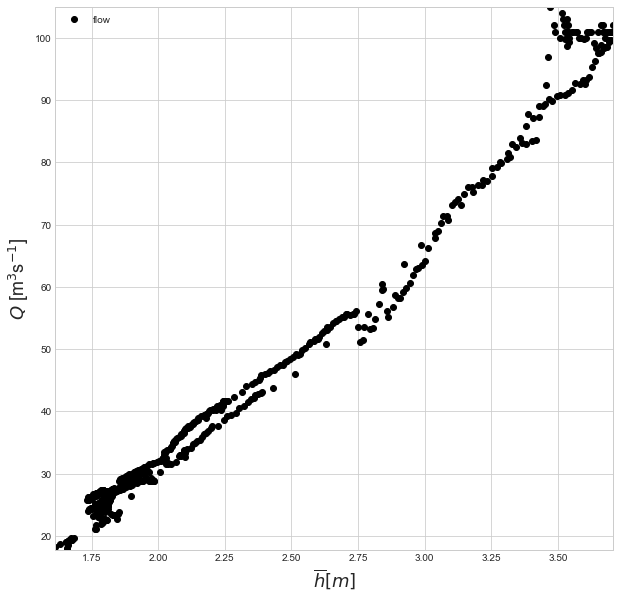

In [17]:
import matplotlib.pyplot as plt 
import pandas as pd 
import operator
import numpy as np

plt.rcParams["figure.figsize"] = [10,10] 
plt.rcParams['axes.edgecolor']='k'
plt.style.use('seaborn-whitegrid')
 
wey = pd.read_csv('river_wey_guildford_from_EA_2013.csv')   # change this as per river data 
day = wey['Day'] 
height = wey['Stage'] 
flow = wey['Flow']

x = height
y = flow
plt.plot(x, y,'o',color='black',linewidth=0.1,label='flow')


plt.xlabel('$\overline {h}$$ [m]$',fontsize=18)
plt.ylabel('$Q$ [m$^3$s$^{-1}$]',fontsize=18)
plt.xlim(min(height),max(height))
plt.ylim(min(flow),max(flow))
plt.legend()
plt.savefig("polyfit.png")
plt.show()